In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

df = pd.read_csv(r"C:\Users\jonat\Documents\GitHub\Dashboard_web\data\vehicles.csv")

In [8]:
df

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,NaN,2018-10-03,37
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,NaN,2018-11-14,22
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,NaN,2018-11-15,32
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,NaN,2018-07-02,71


**price:** Valor pelo qual o veículo está sendo anunciado. Geralmente representa o preço em dólares ou na moeda local.

**model_year:** Ano de fabricação ou modelo do veículo. Por exemplo, “2011.0” indica que o veículo é do ano 2011.

**model:** Modelo e, em muitos casos, também a marca do veículo. Exemplo: “bmw x5” ou “ford f-150”.

**condition:** Estado ou condição do veículo. Os valores podem variar de “excellent” (excelente), “like new” (como novo), “good” (bom), “fair” (razoável) até “salvage” (acidentado ou com problemas).

**cylinders:** Número de cilindros do motor do veículo. Esse número pode dar uma ideia da potência e do tipo de motor.

**fuel:** Tipo de combustível utilizado pelo veículo, como “gas” (gasolina) ou outros combustíveis que possam aparecer (diesel, elétrico, etc).

**odometer:** Quilometragem ou milhagem do veículo. Esse valor indica quantos quilômetros ou milhas o veículo percorreu.

**transmission:** Tipo de transmissão do veículo. Por exemplo, “automatic” (automático) ou “manual”.

**type:** Tipo de veículo, como “SUV”, “sedan”, “pickup”, entre outros. Essa coluna ajuda a identificar a categoria ou formato do veículo.

**paint_color:** Cor da pintura do veículo. Pode conter valores como “black”, “white”, “red”, etc. Em alguns casos, pode estar ausente (NaN).

**is_4wd:** Indicador de se o veículo possui tração nas quatro rodas (four-wheel drive). Normalmente, valores como 1 podem indicar que possui, enquanto NaN ou 0 indicam o contrário.

**date_posted:** Data em que o anúncio foi publicado. Por exemplo, “2018-06-23” indica que o veículo foi anunciado nesta data.

**days_listed:** Número de dias que o anúncio ficou ativo. Essa informação pode ajudar a entender quanto tempo o veículo permaneceu no mercado.

In [18]:
df.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


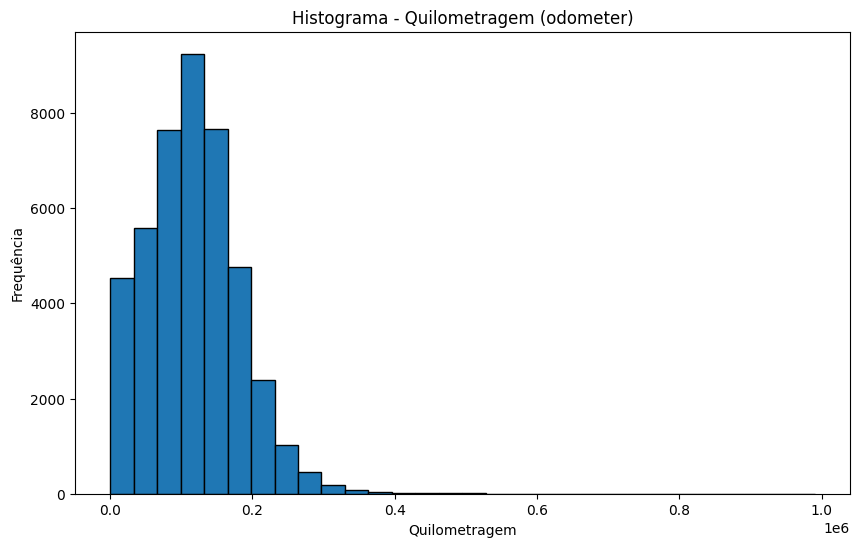

In [ ]:
dropdown = widgets.Dropdown(
    options=df.columns.tolist(),
    description='Coluna:',
    disabled=False,
)

# Função que atualiza o histograma de acordo com a coluna selecionada
def update_hist(coluna):
    # Remove valores nulos para evitar problemas no plot
    dados = df[coluna].dropna()
    
    # Configura o tamanho da figura
    plt.figure(figsize=(10, 6))
    
    # Cria o histograma
    plt.hist(dados, bins=30, edgecolor='black')
    
    # Adiciona título e rótulos
    plt.title(f'Histograma - {coluna}')
    plt.xlabel(coluna)
    plt.ylabel('Frequência')
    
    plt.show()

# Cria a interação com o widget
interact(update_hist, coluna=dropdown)